# Navigation

---

This notebook is ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
model_path = 'model.pt'

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Play Banana Program with Trained Model
Agent is trained by Double DQN and Prioritized Replay Buffer. 

following code will shows average score after playing 100 episode of banana game with trained model

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=1)
agent.qnetwork_local.load_state_dict(torch.load(model_path))

n_episodes = 100
scores_window = deque(maxlen=100)                       # last 100 scores

for i_episode in range(1, n_episodes+1):
    env_info = env.reset(train_mode=True)[brain_name]  # reset the environment    
    state = env_info.vector_observations[0]             # get the current state
    score = 0
    while True:
        action = agent.act(state)                 # select an action
        env_info = env.step([action])[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
    scores_window.append(score)
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
    
print("\n100 Average Score: {}".format(np.mean(scores_window)))

Episode 100	Average Score: 15.04
100 Average Score: 15.04


### 3. Legacy(Training Progress and Result)
This code is about training model and output is about training result

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda:0
Episode 100	Average Score: 0.42
Episode 200	Average Score: 4.10
Episode 300	Average Score: 6.86
Episode 400	Average Score: 10.01
Episode 500	Average Score: 13.14
Episode 600	Average Score: 13.80
Episode 700	Average Score: 14.14
Episode 800	Average Score: 15.00
Episode 900	Average Score: 15.61
Episode 1000	Average Score: 15.55


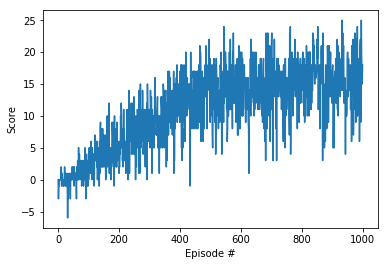

In [5]:
%load_ext autoreload
%autoreload 2

import dqn_agent
from ReplayBuffer import PrioritizedReplayBuffer


agent = dqn_agent.Agent(state_size=37, action_size=4, seed=1)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment    

def dqn(n_episodes=1000, max_t=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step([action])[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]  
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}, Current Score: {:.2f}'.format(i_episode, np.mean(scores_window), score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=20.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), model_path)
            break
            
    torch.save(agent.qnetwork_local.state_dict(), model_path)
    env.close()
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()